Import the Packages:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import scipy as sp
from scipy.optimize import curve_fit

Load the data into an array

In [4]:
with open("df.txt") as f: #replace the parameter with your file name
    lines = f.readlines()
data = []
L = []
T = []

for i in lines:
    data.append([float(i[131:139]), float(i[158: 164])])
    L.append(data[-1][0])
    T.append(data[-1][1])

Create a scatter plot between the raw data of Luminosity and Temperature

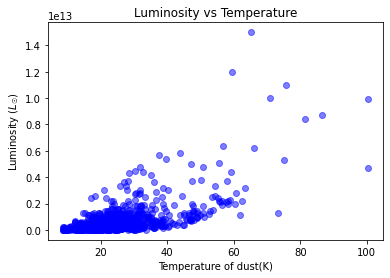

In [5]:
plt.scatter(T, L, color = "blue", alpha=0.5)
plt.ylabel("Luminosity ($L_☉$)")
plt.xlabel("Temperature of dust(K)")
plt.title("Luminosity vs Temperature")
plt.show()

Remove the outliers which are 2 standard deviations from the mean, and plot the sorted array in a new scatter plot.

In [6]:
stdL = np.std(L)
meanL = np.mean(L)
stdT = np.std(T)
meanT = np.mean(T)

L_2std = []
T_2std = []

for i in range(len(L)):
    if ((L[i] < meanL + 2*stdL) and (L[i] > meanL - stdL) and (T[i] < meanT + stdT) and (T[i] > meanT - 2*stdT)):
        L_2std.append(L[i])
        T_2std.append(T[i])

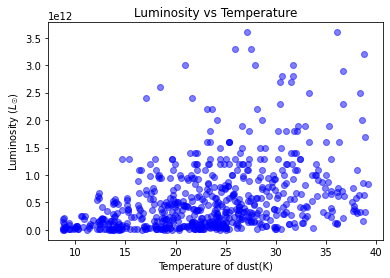

In [7]:
plt.scatter(T_2std, L_2std, color = "blue", alpha=0.5)
plt.ylabel("Luminosity ($L_☉$)")
plt.xlabel("Temperature of dust(K)")
plt.title("Luminosity vs Temperature")

plt.show()

Calculate the correlation coefficient

In [8]:
r = np.corrcoef(L, T)
print(r)

[[1.         0.63070093]
 [0.63070093 1.        ]]


Convert Luminosity from Solar Luminosity into Watts, and then create a scatter plot

2.0976051485803406 35.16032414071534


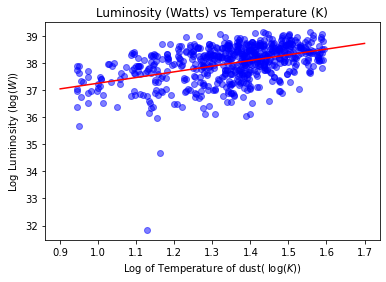

In [13]:
L_watts = np.asarray(L_2std)*3.827e+26

plt.scatter(np.log10(T_2std), np.log10(L_watts), color = "blue", alpha=0.5)
plt.ylabel("Log Luminosity ($\log(W)$)")
plt.xlabel("Log of Temperature of dust( $ \log (K) $)")
plt.title("Luminosity (Watts) vs Temperature (K)")

m, b = np.polyfit(np.log10(T_2std), np.log10(L_watts), 1)
x = np.linspace(0.9, 1.7)
y = m*x+b
print(m, b)
plt.plot(x, y, color='r')

plt.show()

Plug the values obtained from the logarithmic curve fitting into a power law relation to create a best fit curve:

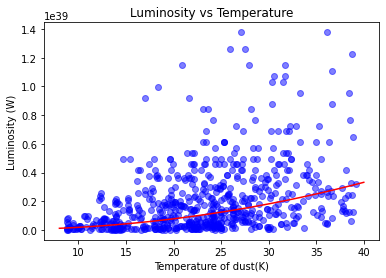

In [14]:
plt.scatter(T_2std, L_watts, color = "blue", alpha=0.5)
plt.ylabel("Luminosity (W)")
plt.xlabel("Temperature of dust(K)")
plt.title("Luminosity vs Temperature")

x = np.linspace(8, 40)
y = 10**(b)*x**(m)
plt.plot(x, y, color='r')

plt.show()